# Projeto 2 - Ciência dos Dados




Nome: Bruno Freitas do Nascimento Rodrigues

Nome: Paulo Augusto dos Passos Oliveira

___
# Introdução:
Doenças cardíacas são uma das principais causas de mortes no mundo, e estas são responsáveis pela morte de aproximadamente 18 milhões de pessoas por ano. Em conjunto destas informações há também características que contribuem para o óbito do paciente (fumar, diabetes, quantidade de sódio no sangue etc.). Tendo isto em vista, nosso objetivo foi entender qual é a importância que cada um destes fatores tem em relação ao óbito. A fim de realizar uma análise de dados sobre a incidência de morte em casos de infarto, nós geraramos modelos para predizer o quanto as características (features) abaixo, afetam de maneira significativa o evento de morte. E por fim, com base nas características (features), foi possível fazer um modelo de predição para o evento de morte. 

___
Importando Bibliotecas necessárias:

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import plotly.graph_objects as go
import plotly.express as px 
from IPython.display import display
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

Checando se dataset foi encontrado:

In [3]:
filename = 'heart_failure.csv'
if filename in os.listdir():
    print(f'O arquivo {filename} foi encontrado, tudo certo para prosseguir!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

O arquivo heart_failure.csv foi encontrado, tudo certo para prosseguir!


### Para tal, iremos utilizar um dataset contendo as informações de 300 casos da BMC Medical Informatics and Decision Making, que contém 13 colunas contendo informações relevantes, estas que estão escritas abaixo:

## Descrição das colunas do conjunto de dados:

** age**: idade da pessoa em anos.<br>
** anamia**: se a pessoa está animica ou não (booleana).<br>
** creatinine_phosphokinase**: contidade de Creatinofosfoquinase presente no sangue em microgramas por litro (mcg/L).<br>
** diabetes**: se a pessoa é diabética ou não (booleana).<br>
** ejection_fraction**: porcetagem do sangue deixa o coração a após a contração.<br>
** high_blood_pressure**: se a pessoa tem hipertensão ou não (booleana).<br>
** platelets**: quantidade de plaquetas no sangue em kiloplaquetas por mililitro (kplaquetas/mL).<br>
** serum_creatinine**: quantidade de creatinina no sangue em miligramas por decilitro (mg/dL).<br>
** serum_sodium**: quantidade de sódio no sangue em miliequivalentes por litro (mEq/L).<br>
** sex**: sexo da pessoa dividido em feminino e masculino, sendo 0=feminino e 1=masculino (binário).<br>
** smoking**: se a pessoa fuma ou não (booleana).<br>
** time**: tempo de acompanhamento após a falha cardíaca em dias.<br>
** DEATH_EVENT**: se a pessoa foi a óbito ou não (booleana).

** Configuração do arquivo: **

In [4]:
dados = pd.read_csv(filename)

In [5]:
#Assegurando que todas as gategorias sejam intrepetadas corretamente
dados['age'] = dados['age'].astype('float64')
dados['anaemia'] = dados['anaemia'].astype('category')
dados['creatinine_phosphokinase'] = dados['creatinine_phosphokinase'].astype('float64')
dados['diabetes'] = dados['diabetes'].astype('category')
dados['ejection_fraction'] = dados['ejection_fraction'].astype('float64')
dados['high_blood_pressure'] = dados['high_blood_pressure'].astype('category')
dados['platelets'] = dados['platelets'].astype('float64')
dados['serum_sodium'] = dados['serum_sodium'].astype('float64')
dados['sex'] = dados['sex'].astype('category')
dados['smoking'] = dados['smoking'].astype('category')
dados['time'] = dados['time'].astype('float64')
dados['DEATH_EVENT'] = dados['DEATH_EVENT'].astype('category')

In [6]:
#Motificando os parametros 0 e 1 para sim e não
dados.anaemia.cat.categories = ['não', 'sim']
dados.diabetes.cat.categories = ['não', 'sim']
dados.high_blood_pressure.cat.categories = ['não', 'sim']
dados.sex.cat.categories = ['M', 'F']
dados.smoking.cat.categories = ['não', 'sim']
dados.DEATH_EVENT.cat.categories = ['não', 'sim']


dados.anaemia = pd.Categorical(dados.anaemia, categories=['não', 'sim'], ordered=False)
dados.diabetes = pd.Categorical(dados.diabetes, categories=['não', 'sim'], ordered=False)
dados.high_blood_pressure = pd.Categorical(dados.high_blood_pressure, categories=['não', 'sim'], ordered=False)
dados.smoking = pd.Categorical(dados.smoking, categories=['não', 'sim'], ordered=False)
dados.DEATH_EVENT = pd.Categorical(dados.DEATH_EVENT, categories=['não', 'sim'], ordered=False)
dados.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,não,582.0,não,20.0,sim,265000.00,1.9,130.0,F,não,4.0,sim
1,55.0,não,7861.0,não,38.0,não,263358.03,1.1,136.0,F,não,6.0,sim
2,65.0,não,146.0,não,20.0,não,162000.00,1.3,129.0,F,sim,7.0,sim
3,50.0,sim,111.0,não,20.0,não,210000.00,1.9,137.0,F,não,7.0,sim
4,65.0,sim,160.0,sim,20.0,não,327000.00,2.7,116.0,M,não,8.0,sim


### Observando a nossa variável alvo (death event), foi possível concluir que ela é qualitativa e com base nisso, cruzamos ela com as variáveis quantitativas e assim construímos sete histogramas.

## Histogramas

Análise comparattiva de histogramas das features entre caso DEATH_EVENT = True e DEATH_EVENT = False

In [6]:
#Divisão entre sobreviventes e mortos
dead = dados[dados["DEATH_EVENT"]=='sim']
not_dead = dados[dados["DEATH_EVENT"]=='não']

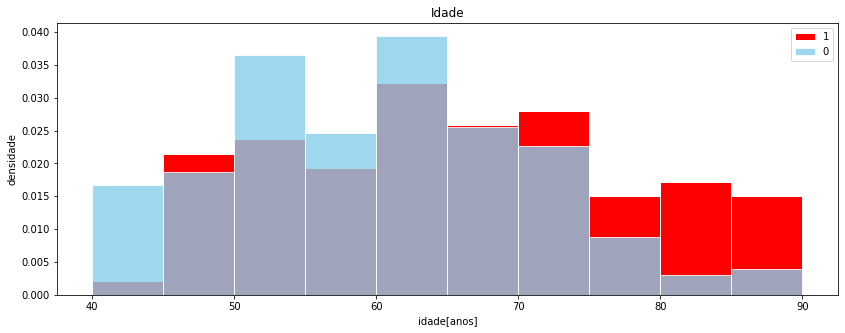

In [15]:
#Histograma da idade dos sobreviventes e não sobreviventes
faixas = np.arange(40,95,5)
plt.figure(figsize=(14, 5))
plt.hist(dead.age, bins=faixas, density=True, color='red', edgecolor='white', linewidth=1)
plt.hist(not_dead.age, bins=faixas, density=True, color='skyblue', edgecolor='white', linewidth=1, alpha=0.8)
plt.legend('10')
plt.title('Idade')
plt.xlabel('idade[anos]')
plt.ylabel('densidade')
plt.show()

O histograma mostra que a idade não aparenta ser um fator determininante para a sobrevivência, tendo um pouco de influência para idades mais altas.

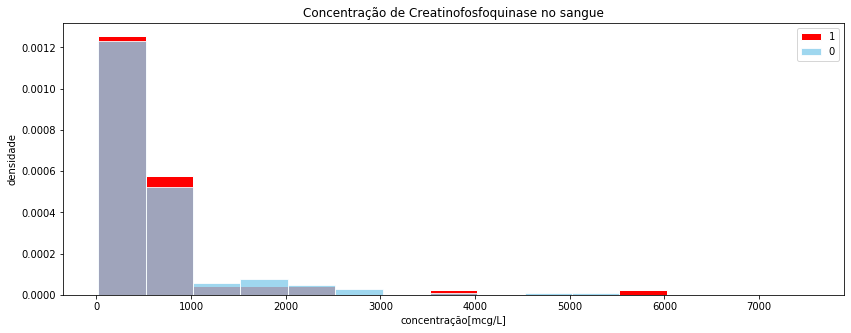

In [16]:
#Histograma da idade dos sobreviventes e não sobreviventes
faixas = np.arange(23,7861,500)
plt.figure(figsize=(14, 5))
plt.hist(dead.creatinine_phosphokinase, bins=faixas, density=True, color='red', edgecolor='white', linewidth=1)
plt.hist(not_dead.creatinine_phosphokinase, bins=faixas, density=True, color='skyblue', edgecolor='white', linewidth=1, alpha=0.8)
plt.legend('10')
plt.title('Concentração de Creatinofosfoquinase no sangue')
plt.xlabel('concentração[mcg/L]')
plt.ylabel('densidade')
plt.show()

Com este histograma foi possível compreender que as taxas de concentração de creatinofosfoquinase não interferem de maneira expressiva nas taxas de mortalidade.


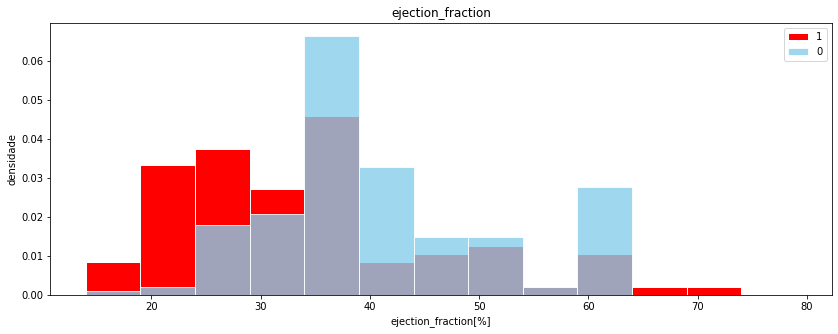

In [17]:
#Histograma da idade dos sobreviventes e não sobreviventes
faixas = np.arange(14,80,5)
plt.figure(figsize=(14, 5))
plt.hist(dead.ejection_fraction, bins=faixas, density=True, color='red', edgecolor='white', linewidth=1)
plt.hist(not_dead.ejection_fraction, bins=faixas, density=True, color='skyblue', edgecolor='white', linewidth=1, alpha=0.8)
plt.legend('10')
plt.title('ejection_fraction')
plt.xlabel('ejection_fraction[%]')
plt.ylabel('densidade')
plt.show()

Com este, é possível perceber que quanto menor a porcentagem de sangue que sai em relação ao que entra, maior será a probabilidade de morte.


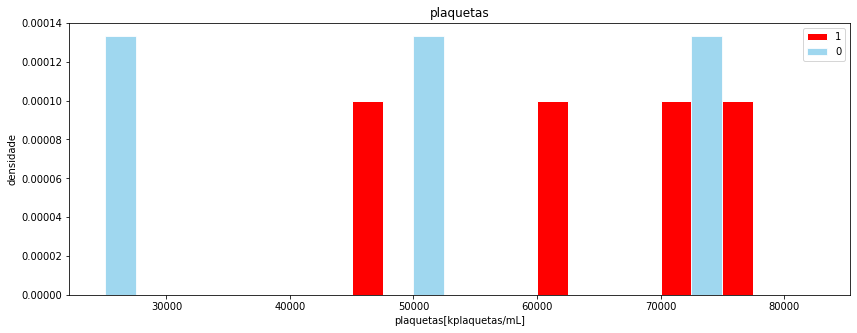

In [18]:
#Histograma de plaquetas no sangue de sobreviventes e não sobreviventes
faixas = np.arange(25000,85000,2500)
plt.figure(figsize=(14, 5))
plt.hist(dead.platelets, bins=faixas, density=True, color='red', edgecolor='white', linewidth=1)
plt.hist(not_dead.platelets, bins=faixas, density=True, color='skyblue', edgecolor='white', linewidth=1, alpha=0.8)
plt.legend('10')
plt.title('plaquetas')
plt.xlabel('plaquetas[kplaquetas/mL]')
plt.ylabel('densidade')
plt.show()

Observando o gráfico, não foi possível concluir nehuma análise concreta, uma vez que há muita dispersão e poucos focos dos valores.


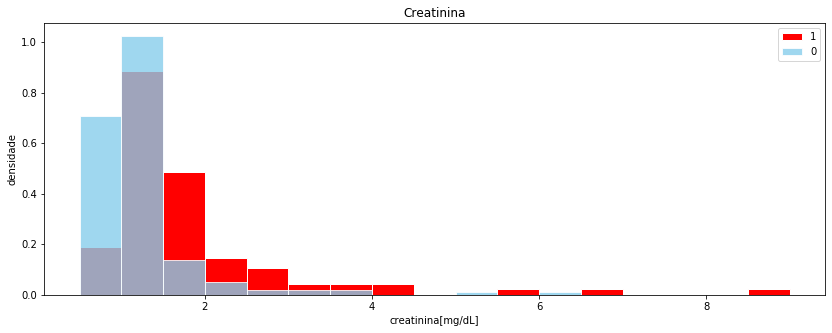

In [19]:
#Histograma de cretinina no sangue de sobreviventes e não sobreviventes
faixas = np.arange(0.5,9.5,0.5)
plt.figure(figsize=(14, 5))
plt.hist(dead.serum_creatinine, bins=faixas, density=True, color='red', edgecolor='white', linewidth=1)
plt.hist(not_dead.serum_creatinine, bins=faixas, density=True, color='skyblue', edgecolor='white', linewidth=1, alpha=0.8)
plt.legend('10')
plt.title('Creatinina')
plt.xlabel('creatinina[mg/dL]')
plt.ylabel('densidade')
plt.show()


Com este gráfico, foi possível concluir que taixas de creatina[mg/dL] maiores que 1.5[mg/dL] influênciam na taxa de sobrevivência.

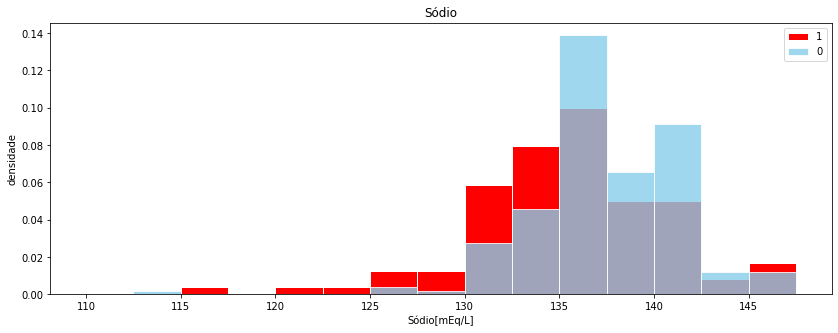

In [20]:
#Histograma de sódio no sangue de sobreviventes e não sobreviventes
faixas = np.arange(110,150,2.5)
plt.figure(figsize=(14, 5))
plt.hist(dead.serum_sodium, bins=faixas, density=True, color='red', edgecolor='white', linewidth=1)
plt.hist(not_dead.serum_sodium, bins=faixas, density=True, color='skyblue', edgecolor='white', linewidth=1, alpha=0.8)
plt.legend('10')
plt.title('Sódio')
plt.xlabel('Sódio[mEq/L]')
plt.ylabel('densidade')
plt.show()

Apesar de uma boa distribuiçao dos dados, taxas de sódio menores que 135[mEq/L] podem influênciar para uma maior mortalidade.

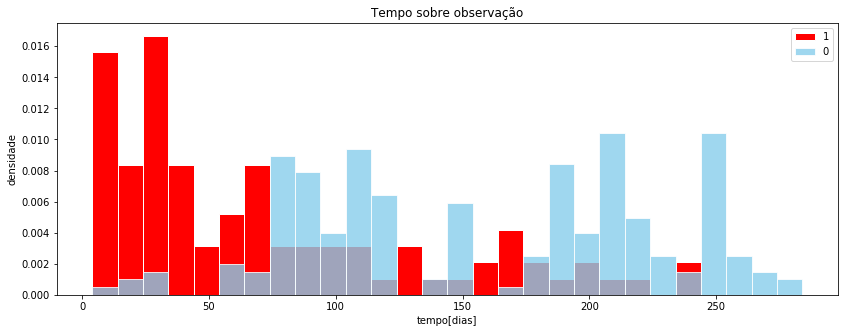

In [21]:
#Histograma de tempo sobre cuidados médicos de sobreviventes e não sobreviventes
faixas = np.arange(4,285,10)
plt.figure(figsize=(14, 5))
plt.hist(dead.time, bins=faixas, density=True, color='red', edgecolor='white', linewidth=1)
plt.hist(not_dead.time, bins=faixas, density=True, color='skyblue', edgecolor='white', linewidth=1, alpha=0.8)
plt.legend('10')
plt.title('Tempo sobre observação')
plt.xlabel('tempo[dias]')
plt.ylabel('densidade')
plt.show()

Neste histograma, fica bem claro que os pacientes que ficaram menos tempo em observação tiveram taxas de mortalidade bem maiores em comparação ao resto.

In [7]:
#Resetando a formatção do dataset
dados = pd.read_csv(filename)
dados['age'] = dados['age'].astype('float64')
dados['anaemia'] = dados['anaemia'].astype('category')
dados['creatinine_phosphokinase'] = dados['creatinine_phosphokinase'].astype('float64')
dados['diabetes'] = dados['diabetes'].astype('category')
dados['ejection_fraction'] = dados['ejection_fraction'].astype('float64')
dados['high_blood_pressure'] = dados['high_blood_pressure'].astype('category')
dados['platelets'] = dados['platelets'].astype('float64')
dados['serum_sodium'] = dados['serum_sodium'].astype('float64')
dados['sex'] = dados['sex'].astype('category')
dados['smoking'] = dados['smoking'].astype('category')
dados['time'] = dados['time'].astype('float64')
dados['DEATH_EVENT'] = dados['DEATH_EVENT'].astype('category')

### Abaixo cruzamos a nossa variável alvo agora com as variáveis qualitativas, e assim geramos quatro gráficos de setor e quatro tabelas de frequência.

## Gráficos de setor

### Anemia x DEATH_EVENT:

Tabela de frequências para entedermos melhor o comportamento da diabetes com o evento de morte e o gráfico de setores abaixo

In [7]:
pd.crosstab(dados.anaemia,dados.DEATH_EVENT, normalize='index', margins=True)

DEATH_EVENT,0,1
anaemia,,
0,0.705882,0.294118
1,0.643411,0.356589
All,0.678930,0.321070


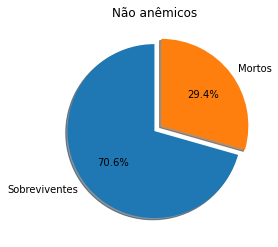

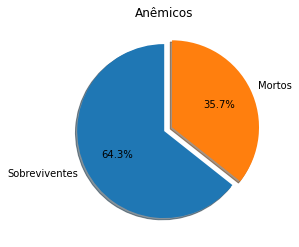

In [8]:
labels = 'Sobreviventes', 'Mortos'
sizes = [0.705882, 0.294118]
explode = (0, 0.1)
#Gráfico não anemicos
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect="equal", title='Não anêmicos')

#Gráfico de anemicos
sizes = [0.643411, 0.356589]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect="equal", title='Anêmicos')
plt.show()

Com estes gráficos de setores, foi possível concluir que ter ou não anemia possui um impacto moderado sobre a taxa de mortalidade.

### Diabetes x DEATH_EVENT:

Tabela de frequências para entedermos melhor o comportamento da diabetes com o evento de morte e o gráfico de setores abaixo

In [23]:
pd.crosstab(dados.diabetes,dados.DEATH_EVENT, normalize='index', margins=True)

DEATH_EVENT,0,1
diabetes,,
0,0.678161,0.321839
1,0.680000,0.320000
All,0.678930,0.321070


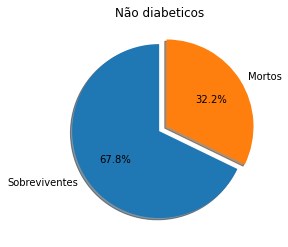

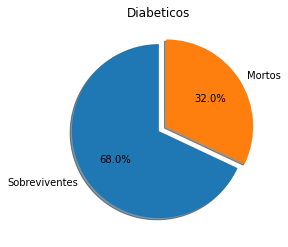

In [14]:
labels = 'Sobreviventes', 'Mortos'
sizes = [0.678161, 0.321839]
explode = (0, 0.1)
#Gráfico não diabeticos
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect="equal", title='Não diabeticos')

#Gráfico de diabeticos
sizes = [0.680000, 0.320000]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect="equal", title='Diabeticos')
plt.show()

Com estes gráficos de setores, foi possível concluir que ter ou não diabetes possui um impacto moderado sobre a taxa de mortalidade.

### Ser fumante x DEATH_EVENT:

Tabela de frequências para entedermos melhor o comportamento da fumantes com o evento de morte e o gráfico de setores abaixo

In [25]:
pd.crosstab(dados.smoking,dados.DEATH_EVENT, normalize='index', margins=True)

DEATH_EVENT,0,1
smoking,,
0,0.674877,0.325123
1,0.687500,0.312500
All,0.678930,0.321070


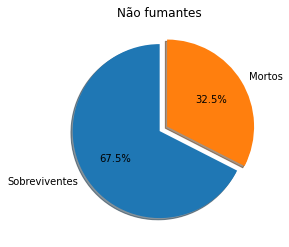

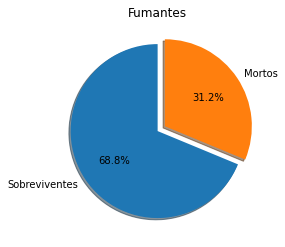

In [15]:
labels = 'Sobreviventes', 'Mortos'
sizes = [0.674877, 0.325123]
explode = (0, 0.1)
#Gráfico não fumantes
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect="equal", title='Não fumantes')

#Gráfico de fumantes
sizes = [0.687500, 0.312500]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect="equal", title='Fumantes')
plt.show()

Com estes, foi possível concluir que fumar não é um habito que influência de maneira significativa nas taxas de mortalidade.

### Hipertensão x DEATH_EVENT:

Tabela de frequências para entedermos melhor o comportamento da hipertensão com o evento de morte e o gráfico de setores abaixo

In [27]:
pd.crosstab(dados.high_blood_pressure,dados.DEATH_EVENT, normalize='index', margins=True)

DEATH_EVENT,0,1
high_blood_pressure,,
0,0.706186,0.293814
1,0.628571,0.371429
All,0.678930,0.321070


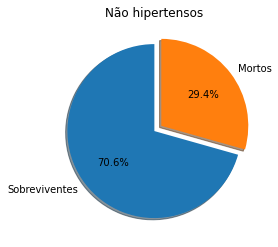

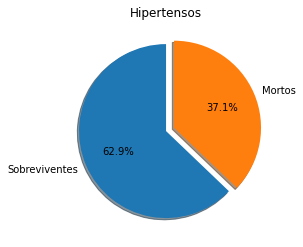

In [9]:
labels = 'Sobreviventes', 'Mortos'
sizes = [00.706186 ,00.293814]
explode = (0, 0.1)
#Gráfico não hipertensos
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect="equal", title='Não hipertensos')
plt.show()

#Gráfico dos hipertensos
sizes = [0.628571, 0.371429]
explode= (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect="equal", title='Hipertensos')
plt.show()

Nestes gráficos de setores, foi possível analisar que há um impacto moderado da pressão alta nas taxas de mortalidade.

### Gênero x DEATH_EVENT:

Tabela de frequências para entedermos melhor o comportamento do gênero com o evento de morte e o gráfico de setores abaixo

In [29]:
pd.crosstab(dados.sex,dados.DEATH_EVENT, normalize=True)

DEATH_EVENT,0,1
sex,,
0,0.237458,0.113712
1,0.441472,0.207358


In [30]:
m = dados[dados["sex"]==1]
f = dados[dados["sex"]==0]

labels = ['Homens - Sobreviventes','Mulheres - Sobreviventes ', "Homem -Não Sobreviventes", "Mulheres - Não Sobreviventes"]
values = [len(m[dados["DEATH_EVENT"]==0]),len(f[dados["DEATH_EVENT"]==0]), len(m[dados["DEATH_EVENT"]==1])
         ,len(f[dados["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.35)])
fig.update_layout(
    title_text="Análise do Gênero - Taxa de mortalidade")
fig.show()

Neste gráfico de setores, foi possível analisar que a taxa de mortalidade entre os dois sexos é bem proxima, assim não o classificando para ser um fator decisivo para a morte da pessoa.

# Preditor
### Agora, nesta etapa foi feita a modelagem utilizando os métodos de regressão logística e arvore de decisão, e também foi feita a simulção.

### Divisão entre dados de treino e dados de teste

In [54]:
Features = ['time','ejection_fraction','serum_creatinine']
x = dados[Features]
y = dados["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

## Regressão Logística:

Esta é uma técnica semelhante ao modelo de regressão linear, porém na logística a variável resposta é binária. Esta é normalmente utilizada quando a variável dependente é categórica, de natureza dicotômica ou binária. Já as independentes podem ou não ser categóricas. Este modelo é utilizado quando a variável resposta é qualitativa com dois resultados possíveis (Exemplo: Para prever se um e-mail é spam, é ou não é um spam 1 ou 0). No caso utilizado em nosso projeto, a variável resposta é uma booleana, onde foi possível prever o evento de morte devido a alguma falha cardíaca. Como em nosso modelo só há duas respostas possíveis, morte ou não morte, esta técnica é coerente com o que queremos prever.

### Simulação e teste de precisão

In [55]:
log = LogisticRegression()
log =log.fit(x_train, y_train)
log_pred = log.predict(x_test)
log_pres = accuracy_score(y_test, log_pred)

In [56]:
#Amostra de um dos testes de precisão
res = {}
res = pd.DataFrame(res)
res['Test'] = pd.Series(y_test)
res['Pred'] = log_pred
display(res.head(5))

,Test,Pred
179,0,0
221,0,0
226,0,0
7,1,0
173,0,0


## Árvore de Decisão:

Uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas. Permite uma comparação de possíveis ações com base em seus custos, probabilidades e benefícios. Podem ser usadas tanto para conduzir diálogos informais quanto para mapear um algoritmo que prevê a melhor escolha. Uma árvore de decisão geralmente começa com um único nó, que se divide em possíveis resultados. Cada um desses resultados leva a nós adicionais, que se ramificam em outras possibilidades. Assim, cria-se uma forma de árvore. Este modelo que é mais utilizado em inferência indutiva foi utilizado em nosso projeto com o intuito de avaliar as 12 características ($features$) em relação ao evento de morte.

In [57]:
Features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking','time']
x = dados[Features]
y = dados["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

tree = DecisionTreeClassifier()
tree = tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_pres = accuracy_score(y_test, tree_pred)

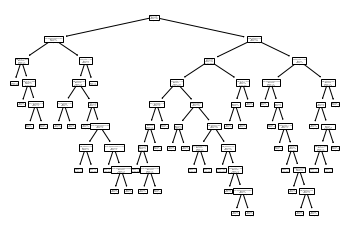

In [58]:
plot_tree(decision_tree= tree.fit(x_train, y_train), feature_names= Features)
plt.show()

In [59]:
#Amostra de um dos testes de precisão
res = {}
res = pd.DataFrame(res)
res['Test'] = pd.Series(y_test)
res['Pred'] = tree_pred
display(res.head(5))

,Test,Pred
179,0,0
221,0,0
226,0,1
7,1,1
173,0,0


# Validação:
## Para a validação, foi utilizado o método de Cross-validation

### Cross-validation:

Esta é uma técnica utilizada em sua maioria na validação de modelos de aprendizado de máquina em uma amostra de dados limitada, machine learning. Em resumo, a validação cruzada é uma técnica que avalia a capacidade de generalização de um modelo, a partir de um conjunto de dados, para isso ele realiza uma troca de elementos do conjunto de teste com os do conjunto de treinamento, por um determinado número de vezes, estipulado por nós, e ao final de cada operação ele gera uma porcentagem de precisão. Assim, neste busca-se estimar o quão preciso é este modelo na prática, ou seja, a sua precisão em um novo conjunto de dados. Portanto, este foi utilizado em nosso projeto, por possuir uma pequena amostra de n = 300, foi utilizado este modelo, pois ele evita que o modelo de validação fique menos preciso.

### Resultados do modelo de regressão logística:


In [60]:
cv_results_log = cross_validate(log, x_test, y_test, cv=10)
precisão_med = np.mean(cv_results_log['test_score'])
print( f'A precisão média é: {precisão_med*100:.2f}%')

A precisão média é: 85.62%


### Resultados do modelo de árvore de decisão:

In [63]:
cv_results_tree = cross_validate(tree, x_test, y_test, cv=10)
precisão_med2 = np.mean(cv_results_tree['test_score'])
print( f'A precisão média é: {precisão_med2*100:.2f}%')

A precisão média é: 85.71%


# Conclusão:
### Por fim, nós concluímos que a concentração de creatinina no sangue, o tempo sob observação e o quanto de sangue que entra no coração sai, são parâmetros que mais afetam a taxa de óbito, e isto foi comprovado tanto pela nossa análise exploratória, histogramas e gráficos de setor, como pela árvore de decisão. Além disso observamos que a precisão possui uma variância significativa, isto se deve ao tamanho da amostra ser pequeno.

#Referências:
- https://bmcmedinformdecismak.biomedcentral.com/
- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
- https://scikit-learn.org/
- http://www.ernestoamaral.com/docs/dcp854b-122/Aula33.pdf
- http://www.portalaction.com.br/analise-de-regressao/regressao-logistica
- https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
- https://edisciplinas.usp.br/pluginfile.php/3769787/mod_resource/content/1/09_RegressaoLogistica.pdf
- https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
- https://www.lucidchart.com/pages/pt/o-que-e-arvore-de-decisao#section_0
- http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/indexf23d.html?id
- https://edisciplinas.usp.br/pluginfile.php/4469825/mod_resource/content/1/ArvoresDecisao_normalsize.pdf
- https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada
- https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross%2Dvalidation%20is%20a%20resampling,k%2Dfold%20cross%2Dvalidation


